In [30]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/FAO-Fertilizer-Data-Analysis


In [31]:
fert_df = pd.read_csv("Inputs_FertilizersNutrient_E_All_Data.csv")
fert_df

Area Code                                     Area  Item Code  \
0              2                              Afghanistan       3102   
1              2                              Afghanistan       3102   
2              2                              Afghanistan       3102   
3              2                              Afghanistan       3102   
4              2                              Afghanistan       3102   
...          ...                                      ...        ...   
97199       5817  Net Food Importing Developing Countries       3104   
97200       5817  Net Food Importing Developing Countries       3104   
97201       5817  Net Food Importing Developing Countries       3104   
97202       5817  Net Food Importing Developing Countries       3104   
97203       5817  Net Food Importing Developing Countries       3104   

                              Item  Element Code           Element  Year Code  \
0      Nutrient nitrogen N (total)          5510        Production       1974   
1      Nutrient nitrogen N (total)          5510        Production       1975   
2      Nutrient nitrogen N (total)          5510        Production       1976   
3      Nutrient nitrogen N (total)          5510        Production       1977   
4      Nutrient nitrogen N (total)          5510        Production       1978   
...                            ...           ...               ...        ...   
97199  Nutrient potash K2O (total)          5157  Agricultural Use       2015   
97200  Nutrient potash K2O (total)          5157  Agricultural Use       2016   
97201  Nutrient potash K2O (total)          5157  Agricultural Use       2017   
97202  Nutrient potash K2O (total)          5157  Agricultural Use       2018   
97203  Nutrient potash K2O (total)          5157  Agricultural Use       2019   

       Year    Unit       Value Flag  
0      1974  tonnes    19117.00   Qm  
1      1975  tonnes    14774.00   Qm  
2      1976  tonnes    26203.00   Qm  
3      1977  tonnes    37689.00   Qm  
4      1978  tonnes    48300.00   Qm  
...     ...     ...         ...  ...  
97199  2015  tonnes  1327349.45    A  
97200  2016  tonnes  1279317.58    A  
97201  2017  tonnes  1478173.59    A  
97202  2018  tonnes  1618023.97    A  
97203  2019  tonnes  1634322.95    A  

[97204 rows x 11 columns]

In [32]:
fert_df['Value'].max()


122971695.94

In [33]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

FID                               COUNTRY ISO     COUNTRYAFF AFF_ISO  \
0    1                        American Samoa  AS  United States      US   
1    2  United States Minor Outlying Islands  UM  United States      US   
2    3                          Cook Islands  CK    New Zealand      NZ   
3    4                      French Polynesia  PF         France      FR   
4    5                                  Niue  NU    New Zealand      NZ   

   SHAPE_Leng  SHAPE_Area                                           geometry  
0    0.600124    0.013720  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1    0.480216    0.003216  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2    0.980664    0.013073  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...  
3    3.930211    0.175332  MULTIPOLYGON (((-149.17920 -17.87084, -149.258...  
4    0.541413    0.021414  POLYGON ((-169.89389 -19.14556, -169.93088 -19...

In [34]:
fert_df['Area'] = fert_df['Area'].str.replace('United States of America', 'United States')
fert_df['Area'] = fert_df['Area'].str.replace('USSR', 'Russian Federation')
fert_df['Area'] = fert_df['Area'].str.replace('Republic of Korea', 'South Korea')
fert_df['Area'] = fert_df['Area'].str.replace("Democratic People's South Korea", 'South Korea')
fert_df['Area'] = fert_df['Area'].str.replace("Democratic People's Republic of Korea", 'North Korea')
fert_df['Area'] = fert_df['Area'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
fert_df['Area'] = fert_df['Area'].str.replace("C�te d'Ivoire", "Côte d'Ivoire")
fert_df['Area'] = fert_df['Area'].str.replace('R�union', 'Réunion')
fert_df['Area'] = fert_df['Area'].str.replace('Syrian Arab Republic', 'Syria')
fert_df['Area'] = fert_df['Area'].str.replace('United Republic of Tanzania', 'Tanzania')
fert_df['Area'] = fert_df['Area'].str.replace('Ethiopia PDR', 'Ethiopia')
fert_df['Area'] = fert_df['Area'].str.replace('Viet Nam', 'Vietnam')
fert_df['Area'] = fert_df['Area'].str.replace('Sudan (former)', 'South Sudan')
fert_df['Area'] = fert_df['Area'].str.replace('Democratic Republic of the Congo', 'Congo DRC')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [35]:
# List country classifications that are not relevent
country_groups = ['Asia', 'Africa', 'Americas', 'Australia and New Zealand', 'Central America', 'Eastern Africa', 
    'Eastern Asia','Eastern Europe', 'European Union', 'Least Developed Countries', 
    'Land Locked Developing Countries', 'Low Income Food Deficit Countries',
    'Middle Africa', 'Net Food Importing Developing Countries', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Small Island Developing States',
    'South America', 'South', 'Southern Africa', 'Southern Asia', 'Southern Europe',
    'Western Africa', 'Western Asia', 'Western Europe']
    

In [36]:
# Loop through fert_df to remove unnessasary classifications
for country in country_groups:
    fert_df = fert_df[fert_df.Area != country]

In [37]:
# Remove country () classifications
# Create selection criteria 2
form_two = r'\s\(.+?\)'

In [38]:
# Remove country- classifications
# Create selection criteria 3
form_three = r'\-.*$'

In [39]:
# Remove country, classifications
# Create selection criteria 1
form_one = r',.*$'

In [40]:
# Create list of former USSR countries and create rows to add to dataframe
USSR_Countries = ['Turkmenistan', 'Uzbekistan', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Armenia', 'Georgia', 'Kazakhstan', 'Moldova', 'Kyrgystan', 'Tajikistan']
Ussr_df = fert_df.loc[(fert_df['Area'] == 'Russian Federation') & (fert_df['Year'] <= 1991)]
Ussr_df = Ussr_df.loc[Ussr_df.index.repeat(len(USSR_Countries))].reset_index(drop=True)
Ussr_df

Area Code                Area  Item Code                         Item  \
0           228  Russian Federation       3102  Nutrient nitrogen N (total)   
1           228  Russian Federation       3102  Nutrient nitrogen N (total)   
2           228  Russian Federation       3102  Nutrient nitrogen N (total)   
3           228  Russian Federation       3102  Nutrient nitrogen N (total)   
4           228  Russian Federation       3102  Nutrient nitrogen N (total)   
...         ...                 ...        ...                          ...   
4116        228  Russian Federation       3104  Nutrient potash K2O (total)   
4117        228  Russian Federation       3104  Nutrient potash K2O (total)   
4118        228  Russian Federation       3104  Nutrient potash K2O (total)   
4119        228  Russian Federation       3104  Nutrient potash K2O (total)   
4120        228  Russian Federation       3104  Nutrient potash K2O (total)   

      Element Code           Element  Year Code  Year    Unit      Value Flag  
0             5510        Production       1961  1961  tonnes  1168000.0   Qm  
1             5510        Production       1961  1961  tonnes  1168000.0   Qm  
2             5510        Production       1961  1961  tonnes  1168000.0   Qm  
3             5510        Production       1961  1961  tonnes  1168000.0   Qm  
4             5510        Production       1961  1961  tonnes  1168000.0   Qm  
...            ...               ...        ...   ...     ...        ...  ...  
4116          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4117          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4118          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4119          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4120          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  

[4121 rows x 11 columns]

In [41]:
# Create data for USSR countries prior to 1992 using USSR data
x = 0
length = len(USSR_Countries)
for i, row in Ussr_df.iterrows():
    new_country = USSR_Countries[x]
    Ussr_df.loc[Ussr_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
Ussr_df   

Area Code          Area  Item Code                         Item  \
0           228  Turkmenistan       3102  Nutrient nitrogen N (total)   
1           228    Uzbekistan       3102  Nutrient nitrogen N (total)   
2           228       Belarus       3102  Nutrient nitrogen N (total)   
3           228       Estonia       3102  Nutrient nitrogen N (total)   
4           228        Latvia       3102  Nutrient nitrogen N (total)   
...         ...           ...        ...                          ...   
4116        228       Georgia       3104  Nutrient potash K2O (total)   
4117        228    Kazakhstan       3104  Nutrient potash K2O (total)   
4118        228       Moldova       3104  Nutrient potash K2O (total)   
4119        228     Kyrgystan       3104  Nutrient potash K2O (total)   
4120        228    Tajikistan       3104  Nutrient potash K2O (total)   

      Element Code           Element  Year Code  Year    Unit      Value Flag  
0             5510        Production       1961  1961  tonnes  1168000.0   Qm  
1             5510        Production       1961  1961  tonnes  1168000.0   Qm  
2             5510        Production       1961  1961  tonnes  1168000.0   Qm  
3             5510        Production       1961  1961  tonnes  1168000.0   Qm  
4             5510        Production       1961  1961  tonnes  1168000.0   Qm  
...            ...               ...        ...   ...     ...        ...  ...  
4116          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4117          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4118          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4119          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
4120          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  

[4121 rows x 11 columns]

In [42]:
# Add USSR country data to fert production dataframe
update_fert_df = pd.concat([fert_df, Ussr_df], ignore_index=True)
update_fert_df

Area Code         Area  Item Code                         Item  \
0              2  Afghanistan       3102  Nutrient nitrogen N (total)   
1              2  Afghanistan       3102  Nutrient nitrogen N (total)   
2              2  Afghanistan       3102  Nutrient nitrogen N (total)   
3              2  Afghanistan       3102  Nutrient nitrogen N (total)   
4              2  Afghanistan       3102  Nutrient nitrogen N (total)   
...          ...          ...        ...                          ...   
85718        228      Georgia       3104  Nutrient potash K2O (total)   
85719        228   Kazakhstan       3104  Nutrient potash K2O (total)   
85720        228      Moldova       3104  Nutrient potash K2O (total)   
85721        228    Kyrgystan       3104  Nutrient potash K2O (total)   
85722        228   Tajikistan       3104  Nutrient potash K2O (total)   

       Element Code           Element  Year Code  Year    Unit      Value Flag  
0              5510        Production       1974  1974  tonnes    19117.0   Qm  
1              5510        Production       1975  1975  tonnes    14774.0   Qm  
2              5510        Production       1976  1976  tonnes    26203.0   Qm  
3              5510        Production       1977  1977  tonnes    37689.0   Qm  
4              5510        Production       1978  1978  tonnes    48300.0   Qm  
...             ...               ...        ...   ...     ...        ...  ...  
85718          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
85719          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
85720          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
85721          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  
85722          5157  Agricultural Use       1991  1991  tonnes  5091000.0    X  

[85723 rows x 11 columns]

In [43]:
# Create list of former Yugoslav countries and create rows to add to dataframe
Yugoslav_Countries = ['Slovania', 'Croatia', 'Bosnia', 'Montenegro', 'North Macedonia', 'Serbia']
yugo_df = update_fert_df.loc[(update_fert_df['Area'] == 'Yugoslav SFR') & (fert_df['Year'] <= 1991)]
yugo_df = yugo_df.loc[yugo_df.index.repeat(len(Yugoslav_Countries))].reset_index(drop=True)
yugo_df

Area Code          Area  Item Code                         Item  \
0           248  Yugoslav SFR       3102  Nutrient nitrogen N (total)   
1           248  Yugoslav SFR       3102  Nutrient nitrogen N (total)   
2           248  Yugoslav SFR       3102  Nutrient nitrogen N (total)   
3           248  Yugoslav SFR       3102  Nutrient nitrogen N (total)   
4           248  Yugoslav SFR       3102  Nutrient nitrogen N (total)   
...         ...           ...        ...                          ...   
1909        248  Yugoslav SFR       3104  Nutrient potash K2O (total)   
1910        248  Yugoslav SFR       3104  Nutrient potash K2O (total)   
1911        248  Yugoslav SFR       3104  Nutrient potash K2O (total)   
1912        248  Yugoslav SFR       3104  Nutrient potash K2O (total)   
1913        248  Yugoslav SFR       3104  Nutrient potash K2O (total)   

      Element Code           Element  Year Code  Year    Unit     Value Flag  
0             5510        Production       1961  1961  tonnes   12960.0   Qm  
1             5510        Production       1961  1961  tonnes   12960.0   Qm  
2             5510        Production       1961  1961  tonnes   12960.0   Qm  
3             5510        Production       1961  1961  tonnes   12960.0   Qm  
4             5510        Production       1961  1961  tonnes   12960.0   Qm  
...            ...               ...        ...   ...     ...       ...  ...  
1909          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1910          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1911          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1912          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1913          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  

[1914 rows x 11 columns]

In [44]:
# Create data for Yugoslavic countries prior to 1992 using Yugoslav data
x = 0
length = len(Yugoslav_Countries)
for i, row in yugo_df.iterrows():
    new_country = Yugoslav_Countries[x]
    yugo_df.loc[yugo_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
yugo_df   

Area Code             Area  Item Code                         Item  \
0           248         Slovania       3102  Nutrient nitrogen N (total)   
1           248          Croatia       3102  Nutrient nitrogen N (total)   
2           248           Bosnia       3102  Nutrient nitrogen N (total)   
3           248       Montenegro       3102  Nutrient nitrogen N (total)   
4           248  North Macedonia       3102  Nutrient nitrogen N (total)   
...         ...              ...        ...                          ...   
1909        248          Croatia       3104  Nutrient potash K2O (total)   
1910        248           Bosnia       3104  Nutrient potash K2O (total)   
1911        248       Montenegro       3104  Nutrient potash K2O (total)   
1912        248  North Macedonia       3104  Nutrient potash K2O (total)   
1913        248           Serbia       3104  Nutrient potash K2O (total)   

      Element Code           Element  Year Code  Year    Unit     Value Flag  
0             5510        Production       1961  1961  tonnes   12960.0   Qm  
1             5510        Production       1961  1961  tonnes   12960.0   Qm  
2             5510        Production       1961  1961  tonnes   12960.0   Qm  
3             5510        Production       1961  1961  tonnes   12960.0   Qm  
4             5510        Production       1961  1961  tonnes   12960.0   Qm  
...            ...               ...        ...   ...     ...       ...  ...  
1909          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1910          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1911          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1912          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
1913          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  

[1914 rows x 11 columns]

In [45]:
# Add Yugoslav country data to fert production dataframe
new_fert_df = pd.concat([update_fert_df, yugo_df], ignore_index=True)
new_fert_df

Area Code             Area  Item Code                         Item  \
0              2      Afghanistan       3102  Nutrient nitrogen N (total)   
1              2      Afghanistan       3102  Nutrient nitrogen N (total)   
2              2      Afghanistan       3102  Nutrient nitrogen N (total)   
3              2      Afghanistan       3102  Nutrient nitrogen N (total)   
4              2      Afghanistan       3102  Nutrient nitrogen N (total)   
...          ...              ...        ...                          ...   
87632        248          Croatia       3104  Nutrient potash K2O (total)   
87633        248           Bosnia       3104  Nutrient potash K2O (total)   
87634        248       Montenegro       3104  Nutrient potash K2O (total)   
87635        248  North Macedonia       3104  Nutrient potash K2O (total)   
87636        248           Serbia       3104  Nutrient potash K2O (total)   

       Element Code           Element  Year Code  Year    Unit     Value Flag  
0              5510        Production       1974  1974  tonnes   19117.0   Qm  
1              5510        Production       1975  1975  tonnes   14774.0   Qm  
2              5510        Production       1976  1976  tonnes   26203.0   Qm  
3              5510        Production       1977  1977  tonnes   37689.0   Qm  
4              5510        Production       1978  1978  tonnes   48300.0   Qm  
...             ...               ...        ...   ...     ...       ...  ...  
87632          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
87633          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
87634          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
87635          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  
87636          5157  Agricultural Use       1991  1991  tonnes  154300.0    X  

[87637 rows x 11 columns]

In [46]:
# Create list of former Czechoslovakia countries and create rows to add to dataframe
Czech_Countries = ['Czeckia', 'Slovakia']
czech_df = fert_df.loc[(fert_df['Area'] == 'Czechoslovakia') & (fert_df['Year'] <= 1992)]
czech_df = czech_df.loc[czech_df.index.repeat(len(Czech_Countries))].reset_index(drop=True)
czech_df

Area Code            Area  Item Code                         Item  \
0           51  Czechoslovakia       3102  Nutrient nitrogen N (total)   
1           51  Czechoslovakia       3102  Nutrient nitrogen N (total)   
2           51  Czechoslovakia       3102  Nutrient nitrogen N (total)   
3           51  Czechoslovakia       3102  Nutrient nitrogen N (total)   
4           51  Czechoslovakia       3102  Nutrient nitrogen N (total)   
..         ...             ...        ...                          ...   
587         51  Czechoslovakia       3104  Nutrient potash K2O (total)   
588         51  Czechoslovakia       3104  Nutrient potash K2O (total)   
589         51  Czechoslovakia       3104  Nutrient potash K2O (total)   
590         51  Czechoslovakia       3104  Nutrient potash K2O (total)   
591         51  Czechoslovakia       3104  Nutrient potash K2O (total)   

     Element Code           Element  Year Code  Year    Unit     Value Flag  
0            5510        Production       1961  1961  tonnes  146200.0   Qm  
1            5510        Production       1961  1961  tonnes  146200.0   Qm  
2            5510        Production       1962  1962  tonnes  153916.0   Qm  
3            5510        Production       1962  1962  tonnes  153916.0   Qm  
4            5510        Production       1963  1963  tonnes  153811.0   Qm  
..            ...               ...        ...   ...     ...       ...  ...  
587          5157  Agricultural Use       1990  1990  tonnes  355900.0    X  
588          5157  Agricultural Use       1991  1991  tonnes   61600.0    X  
589          5157  Agricultural Use       1991  1991  tonnes   61600.0    X  
590          5157  Agricultural Use       1992  1992  tonnes   35100.0    X  
591          5157  Agricultural Use       1992  1992  tonnes   35100.0    X  

[592 rows x 11 columns]

In [47]:
# Create data for Czechoslovakian countries prior to 1993 using Czechoslovakia data
x = 0
length = len(Czech_Countries)
for i, row in czech_df.iterrows():
    new_country = Czech_Countries[x]
    czech_df.loc[czech_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
czech_df

Area Code      Area  Item Code                         Item  \
0           51   Czeckia       3102  Nutrient nitrogen N (total)   
1           51  Slovakia       3102  Nutrient nitrogen N (total)   
2           51   Czeckia       3102  Nutrient nitrogen N (total)   
3           51  Slovakia       3102  Nutrient nitrogen N (total)   
4           51   Czeckia       3102  Nutrient nitrogen N (total)   
..         ...       ...        ...                          ...   
587         51  Slovakia       3104  Nutrient potash K2O (total)   
588         51   Czeckia       3104  Nutrient potash K2O (total)   
589         51  Slovakia       3104  Nutrient potash K2O (total)   
590         51   Czeckia       3104  Nutrient potash K2O (total)   
591         51  Slovakia       3104  Nutrient potash K2O (total)   

     Element Code           Element  Year Code  Year    Unit     Value Flag  
0            5510        Production       1961  1961  tonnes  146200.0   Qm  
1            5510        Production       1961  1961  tonnes  146200.0   Qm  
2            5510        Production       1962  1962  tonnes  153916.0   Qm  
3            5510        Production       1962  1962  tonnes  153916.0   Qm  
4            5510        Production       1963  1963  tonnes  153811.0   Qm  
..            ...               ...        ...   ...     ...       ...  ...  
587          5157  Agricultural Use       1990  1990  tonnes  355900.0    X  
588          5157  Agricultural Use       1991  1991  tonnes   61600.0    X  
589          5157  Agricultural Use       1991  1991  tonnes   61600.0    X  
590          5157  Agricultural Use       1992  1992  tonnes   35100.0    X  
591          5157  Agricultural Use       1992  1992  tonnes   35100.0    X  

[592 rows x 11 columns]

In [48]:
# Add Czech country data to fert production dataframe
additional_fert_df = pd.concat([new_fert_df, czech_df], ignore_index=True)
additional_fert_df

Area Code         Area  Item Code                         Item  \
0              2  Afghanistan       3102  Nutrient nitrogen N (total)   
1              2  Afghanistan       3102  Nutrient nitrogen N (total)   
2              2  Afghanistan       3102  Nutrient nitrogen N (total)   
3              2  Afghanistan       3102  Nutrient nitrogen N (total)   
4              2  Afghanistan       3102  Nutrient nitrogen N (total)   
...          ...          ...        ...                          ...   
88224         51     Slovakia       3104  Nutrient potash K2O (total)   
88225         51      Czeckia       3104  Nutrient potash K2O (total)   
88226         51     Slovakia       3104  Nutrient potash K2O (total)   
88227         51      Czeckia       3104  Nutrient potash K2O (total)   
88228         51     Slovakia       3104  Nutrient potash K2O (total)   

       Element Code           Element  Year Code  Year    Unit     Value Flag  
0              5510        Production       1974  1974  tonnes   19117.0   Qm  
1              5510        Production       1975  1975  tonnes   14774.0   Qm  
2              5510        Production       1976  1976  tonnes   26203.0   Qm  
3              5510        Production       1977  1977  tonnes   37689.0   Qm  
4              5510        Production       1978  1978  tonnes   48300.0   Qm  
...             ...               ...        ...   ...     ...       ...  ...  
88224          5157  Agricultural Use       1990  1990  tonnes  355900.0    X  
88225          5157  Agricultural Use       1991  1991  tonnes   61600.0    X  
88226          5157  Agricultural Use       1991  1991  tonnes   61600.0    X  
88227          5157  Agricultural Use       1992  1992  tonnes   35100.0    X  
88228          5157  Agricultural Use       1992  1992  tonnes   35100.0    X  

[88229 rows x 11 columns]

In [49]:
# Remove Czechoslovakia data
additional_fert_df = additional_fert_df[additional_fert_df.Area != 'Czechoslovakia']

In [50]:
# Create list to split Serbia and Montenegro countries and create rows to add to dataframe
Serb_Mont_Countries = ['Serbia', 'Montenegro']
SerbMont_df = fert_df.loc[(fert_df['Area'] == 'Serbia and Montenegro') & (fert_df['Year'] <= 2005)]
SerbMont_df = SerbMont_df.loc[SerbMont_df.index.repeat(len(Serb_Mont_Countries))].reset_index(drop=True)
SerbMont_df

Area Code                   Area  Item Code                         Item  \
0          186  Serbia and Montenegro       3102  Nutrient nitrogen N (total)   
1          186  Serbia and Montenegro       3102  Nutrient nitrogen N (total)   
2          186  Serbia and Montenegro       3102  Nutrient nitrogen N (total)   
3          186  Serbia and Montenegro       3102  Nutrient nitrogen N (total)   
4          186  Serbia and Montenegro       3102  Nutrient nitrogen N (total)   
..         ...                    ...        ...                          ...   
221        186  Serbia and Montenegro       3104  Nutrient potash K2O (total)   
222        186  Serbia and Montenegro       3104  Nutrient potash K2O (total)   
223        186  Serbia and Montenegro       3104  Nutrient potash K2O (total)   
224        186  Serbia and Montenegro       3104  Nutrient potash K2O (total)   
225        186  Serbia and Montenegro       3104  Nutrient potash K2O (total)   

     Element Code           Element  Year Code  Year    Unit     Value Flag  
0            5510        Production       1992  1992  tonnes   78000.0    E  
1            5510        Production       1992  1992  tonnes   78000.0    E  
2            5510        Production       1993  1993  tonnes   58800.0    X  
3            5510        Production       1993  1993  tonnes   58800.0    X  
4            5510        Production       1994  1994  tonnes   70000.0    X  
..            ...               ...        ...   ...     ...       ...  ...  
221          5157  Agricultural Use       2003  2003  tonnes   85860.0   Fb  
222          5157  Agricultural Use       2004  2004  tonnes  112052.0   Fb  
223          5157  Agricultural Use       2004  2004  tonnes  112052.0   Fb  
224          5157  Agricultural Use       2005  2005  tonnes   91825.0   Fb  
225          5157  Agricultural Use       2005  2005  tonnes   91825.0   Fb  

[226 rows x 11 columns]

In [51]:
# Create data for Serbia and Montenegro countries prior to 1993 using Serbia/Montenegro data
x = 0
length = len(Serb_Mont_Countries)
for i, row in SerbMont_df.iterrows():
    new_country = Serb_Mont_Countries[x]
    SerbMont_df.loc[SerbMont_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
SerbMont_df

Area Code        Area  Item Code                         Item  \
0          186      Serbia       3102  Nutrient nitrogen N (total)   
1          186  Montenegro       3102  Nutrient nitrogen N (total)   
2          186      Serbia       3102  Nutrient nitrogen N (total)   
3          186  Montenegro       3102  Nutrient nitrogen N (total)   
4          186      Serbia       3102  Nutrient nitrogen N (total)   
..         ...         ...        ...                          ...   
221        186  Montenegro       3104  Nutrient potash K2O (total)   
222        186      Serbia       3104  Nutrient potash K2O (total)   
223        186  Montenegro       3104  Nutrient potash K2O (total)   
224        186      Serbia       3104  Nutrient potash K2O (total)   
225        186  Montenegro       3104  Nutrient potash K2O (total)   

     Element Code           Element  Year Code  Year    Unit     Value Flag  
0            5510        Production       1992  1992  tonnes   78000.0    E  
1            5510        Production       1992  1992  tonnes   78000.0    E  
2            5510        Production       1993  1993  tonnes   58800.0    X  
3            5510        Production       1993  1993  tonnes   58800.0    X  
4            5510        Production       1994  1994  tonnes   70000.0    X  
..            ...               ...        ...   ...     ...       ...  ...  
221          5157  Agricultural Use       2003  2003  tonnes   85860.0   Fb  
222          5157  Agricultural Use       2004  2004  tonnes  112052.0   Fb  
223          5157  Agricultural Use       2004  2004  tonnes  112052.0   Fb  
224          5157  Agricultural Use       2005  2005  tonnes   91825.0   Fb  
225          5157  Agricultural Use       2005  2005  tonnes   91825.0   Fb  

[226 rows x 11 columns]

In [52]:
# Add Serbia and Montenegro country data to fert production dataframe
final_fert_df = pd.concat([additional_fert_df, SerbMont_df], ignore_index=True)
final_fert_df

Area Code         Area  Item Code                         Item  \
0              2  Afghanistan       3102  Nutrient nitrogen N (total)   
1              2  Afghanistan       3102  Nutrient nitrogen N (total)   
2              2  Afghanistan       3102  Nutrient nitrogen N (total)   
3              2  Afghanistan       3102  Nutrient nitrogen N (total)   
4              2  Afghanistan       3102  Nutrient nitrogen N (total)   
...          ...          ...        ...                          ...   
88154        186   Montenegro       3104  Nutrient potash K2O (total)   
88155        186       Serbia       3104  Nutrient potash K2O (total)   
88156        186   Montenegro       3104  Nutrient potash K2O (total)   
88157        186       Serbia       3104  Nutrient potash K2O (total)   
88158        186   Montenegro       3104  Nutrient potash K2O (total)   

       Element Code           Element  Year Code  Year    Unit     Value Flag  
0              5510        Production       1974  1974  tonnes   19117.0   Qm  
1              5510        Production       1975  1975  tonnes   14774.0   Qm  
2              5510        Production       1976  1976  tonnes   26203.0   Qm  
3              5510        Production       1977  1977  tonnes   37689.0   Qm  
4              5510        Production       1978  1978  tonnes   48300.0   Qm  
...             ...               ...        ...   ...     ...       ...  ...  
88154          5157  Agricultural Use       2003  2003  tonnes   85860.0   Fb  
88155          5157  Agricultural Use       2004  2004  tonnes  112052.0   Fb  
88156          5157  Agricultural Use       2004  2004  tonnes  112052.0   Fb  
88157          5157  Agricultural Use       2005  2005  tonnes   91825.0   Fb  
88158          5157  Agricultural Use       2005  2005  tonnes   91825.0   Fb  

[88159 rows x 11 columns]

In [53]:
# Remove Serbia and Montenegro data
final_fert_df = final_fert_df[final_fert_df.Area != 'Serbia and Montenegro']

<AxesSubplot:>

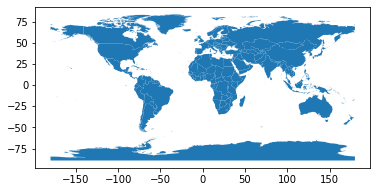

In [54]:
map_df.plot()

In [55]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(fert_df.set_index("Area"))
merged.head()

FID ISO   COUNTRYAFF AFF_ISO  SHAPE_Leng  SHAPE_Area  \
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   

                                                      geometry  Area Code  \
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   

             Item Code                         Item  Element Code     Element  \
Afghanistan     3102.0  Nutrient nitrogen N (total)        5510.0  Production   
Afghanistan     3102.0  Nutrient nitrogen N (total)        5510.0  Production   
Afghanistan     3102.0  Nutrient nitrogen N (total)        5510.0  Production   
Afghanistan     3102.0  Nutrient nitrogen N (total)        5510.0  Production   
Afghanistan     3102.0  Nutrient nitrogen N (total)        5510.0  Production   

             Year Code    Year    Unit    Value Flag  
Afghanistan     1974.0  1974.0  tonnes  19117.0   Qm  
Afghanistan     1975.0  1975.0  tonnes  14774.0   Qm  
Afghanistan     1976.0  1976.0  tonnes  26203.0   Qm  
Afghanistan     1977.0  1977.0  tonnes  37689.0   Qm  
Afghanistan     1978.0  1978.0  tonnes  48300.0   Qm

In [56]:
# Get a list of years for data loops
from datetime import date

start = date(1961, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [57]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 1000000

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


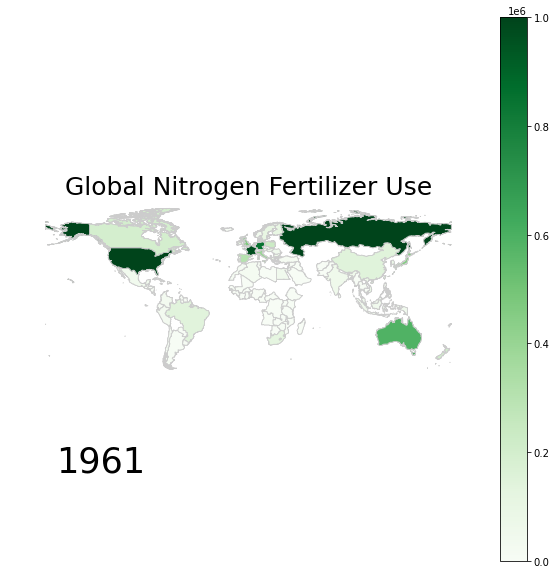

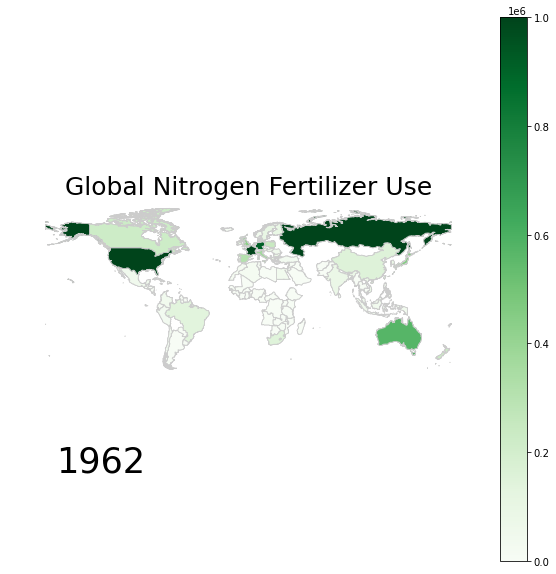

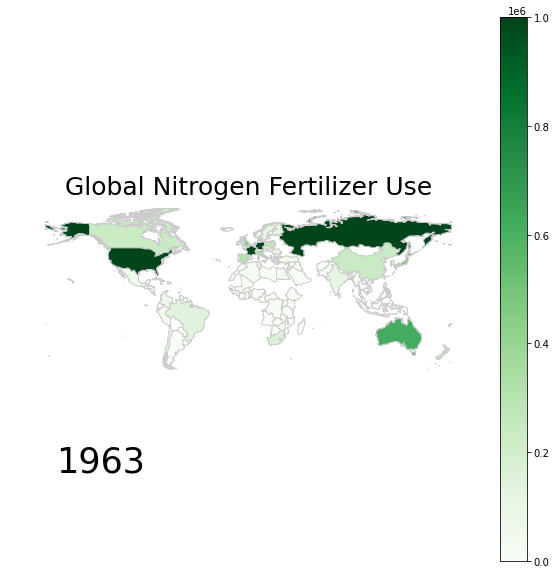

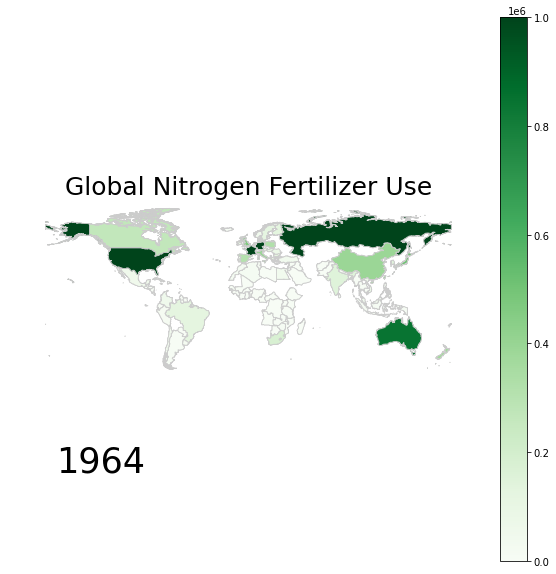

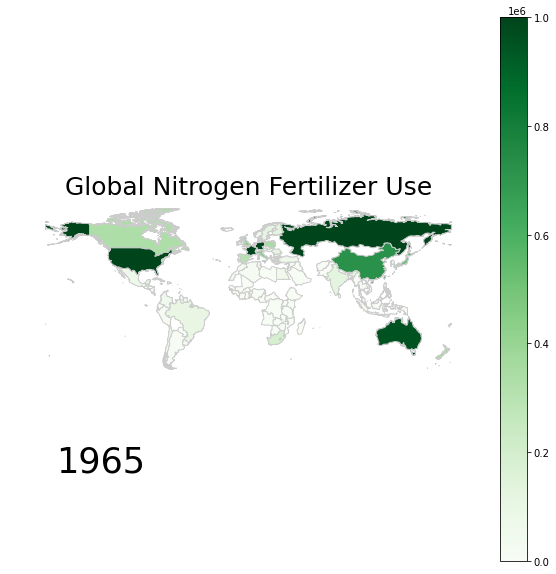

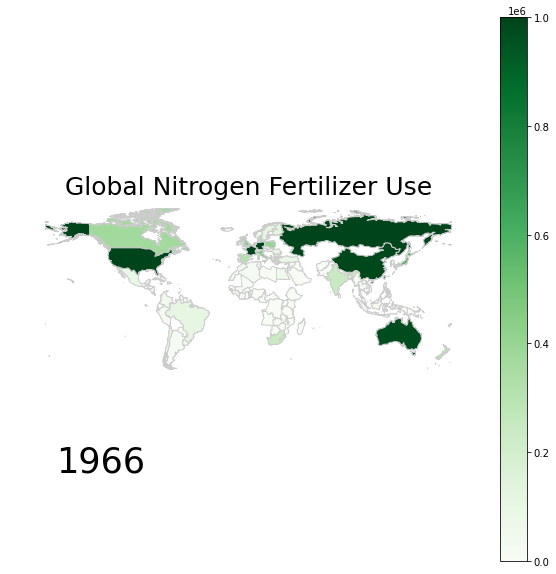

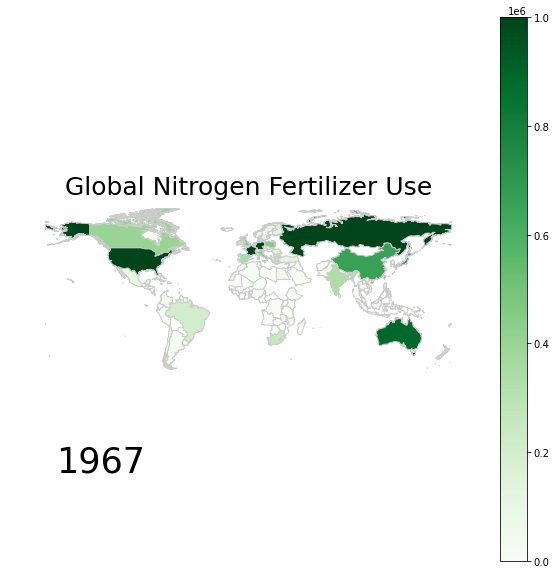

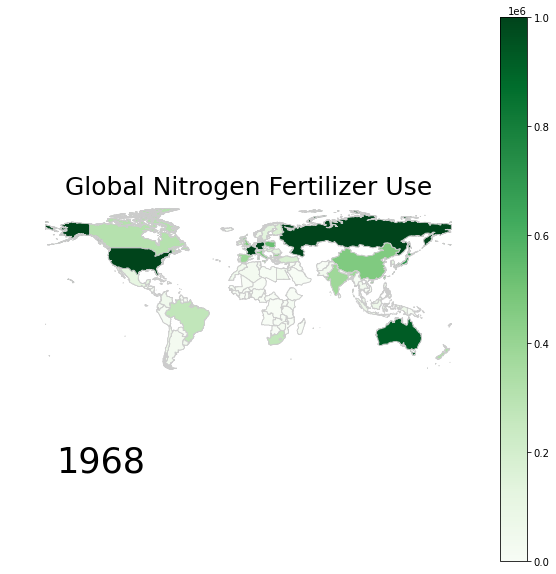

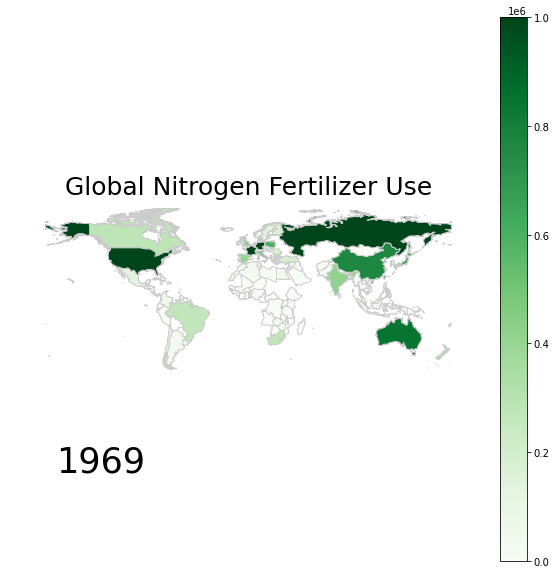

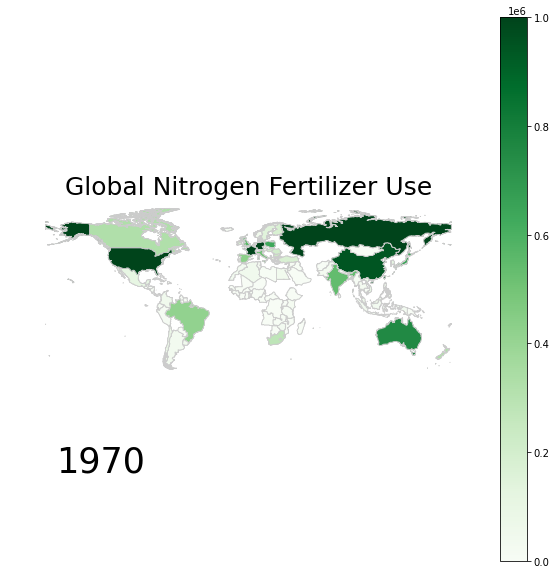

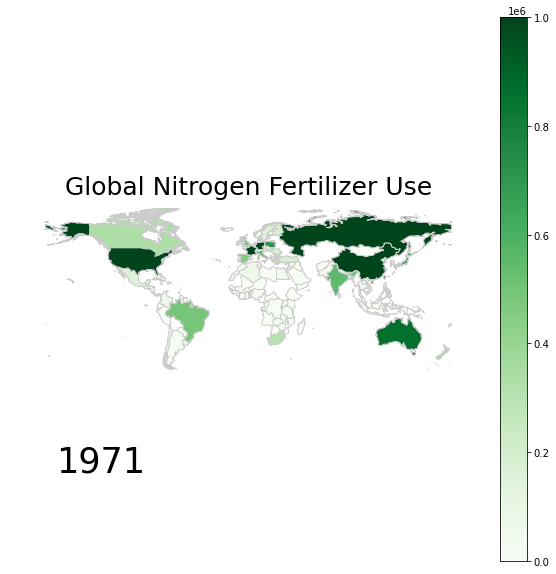

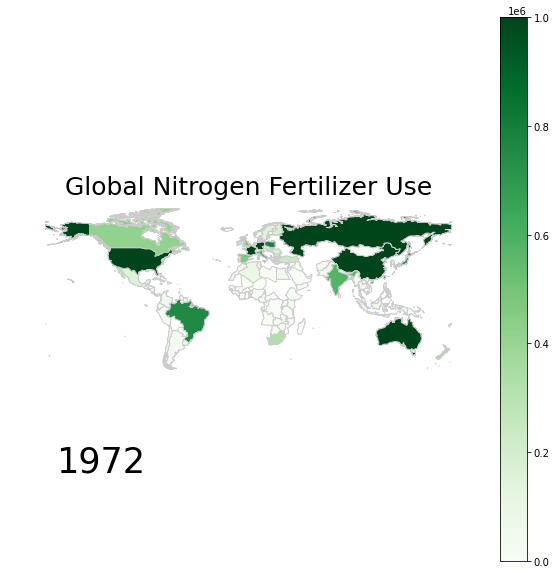

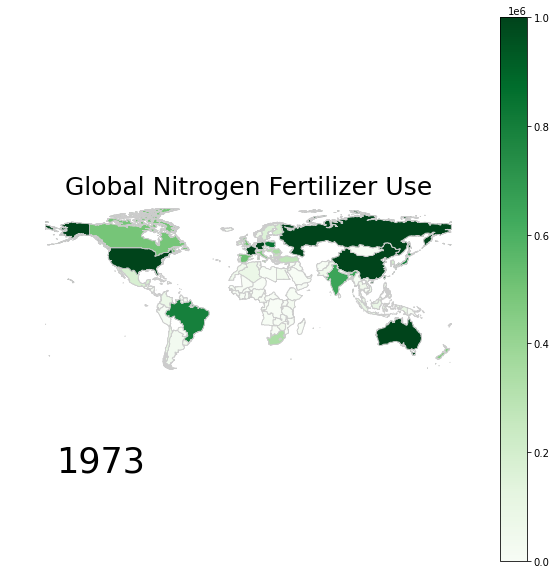

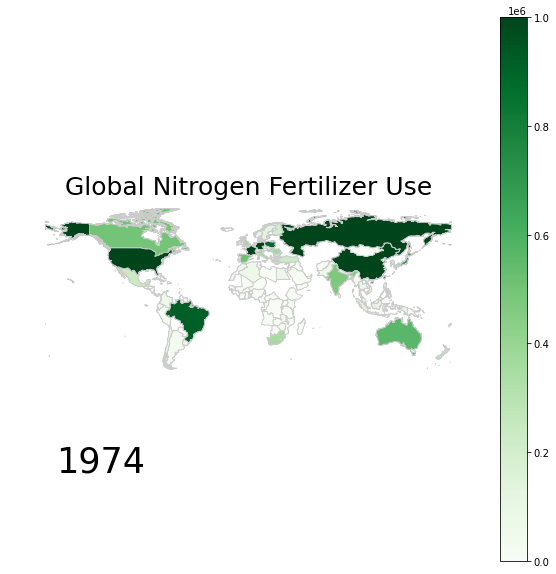

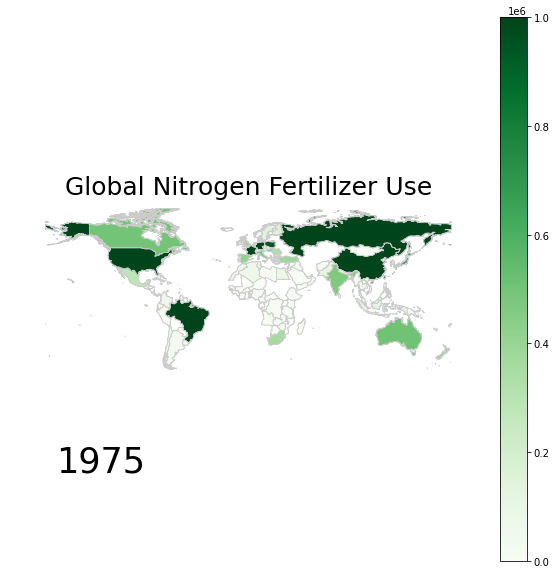

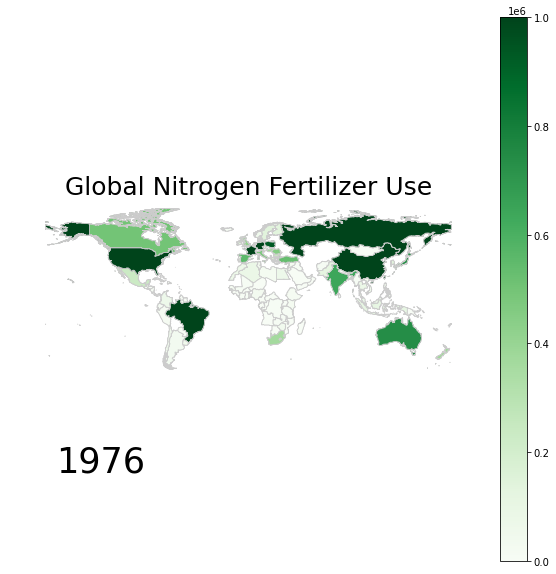

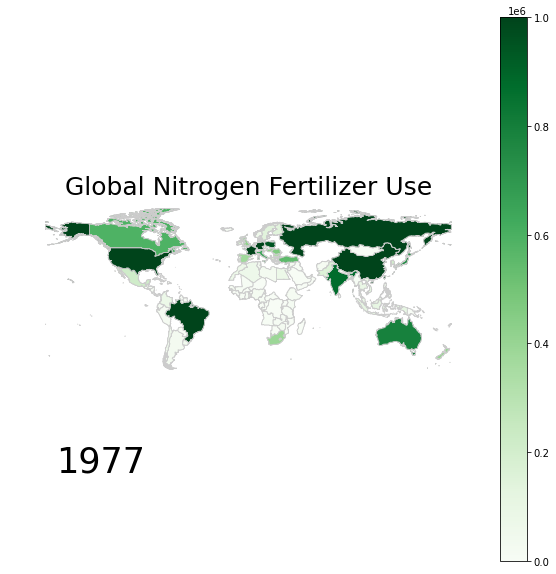

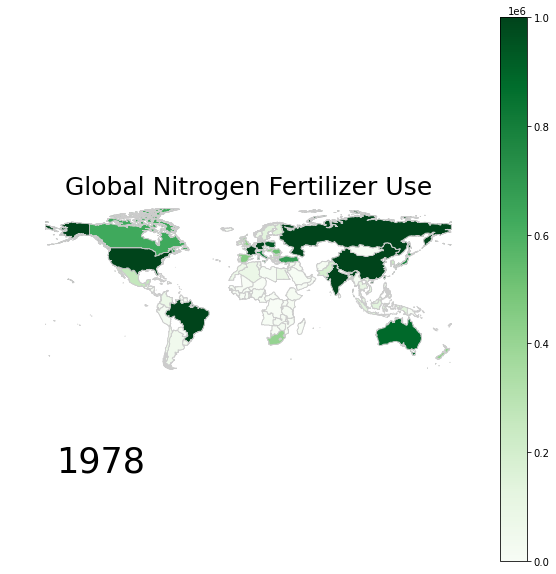

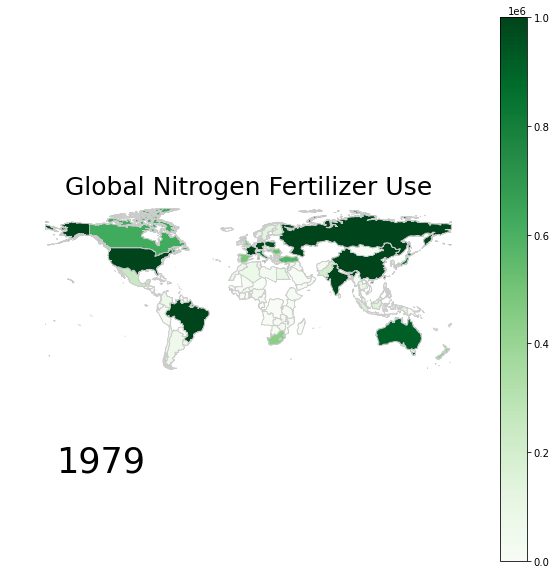

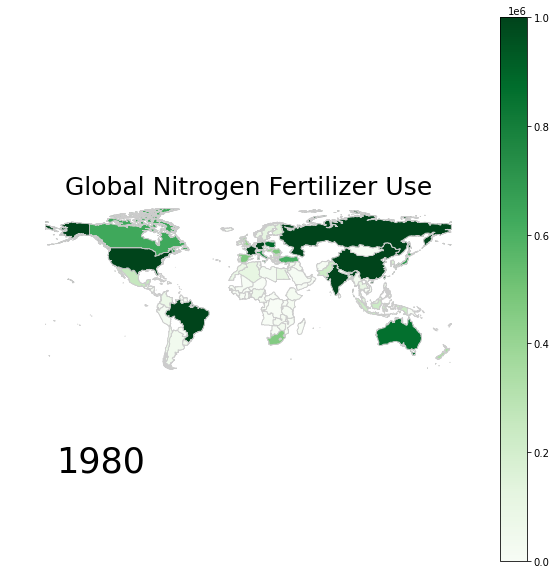

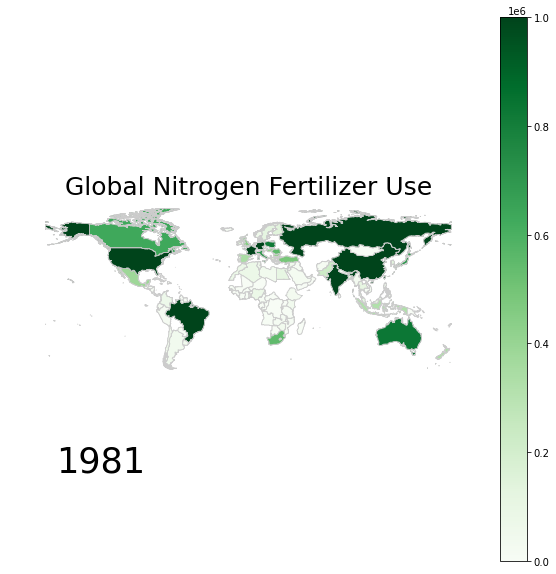

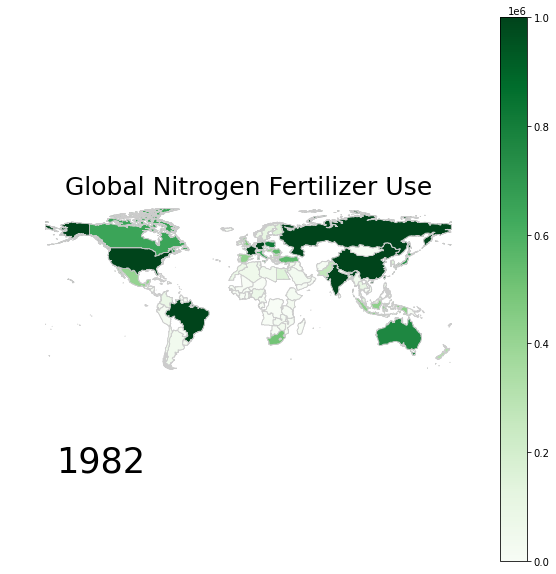

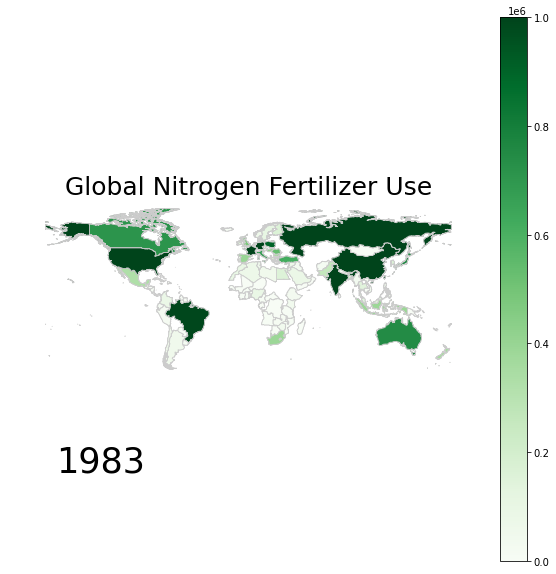

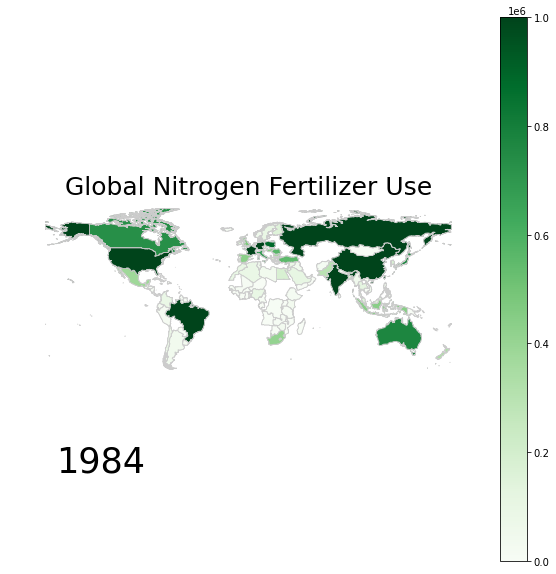

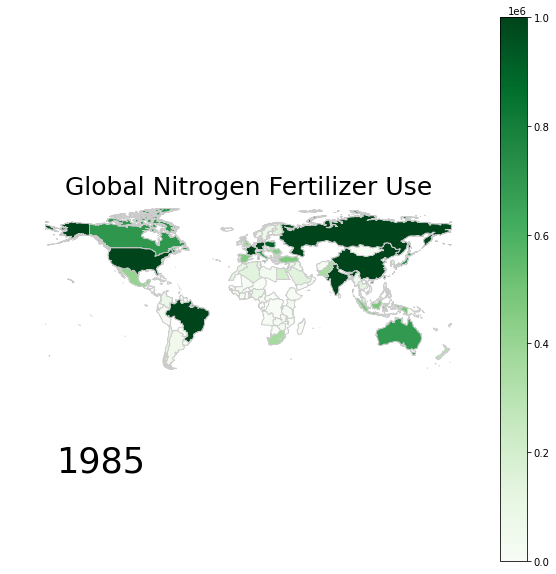

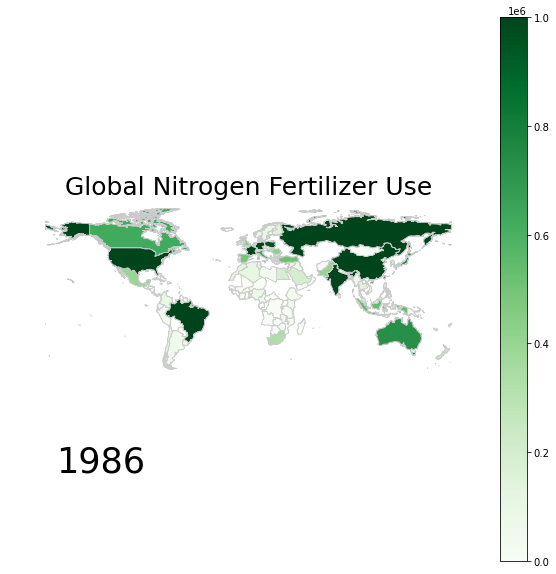

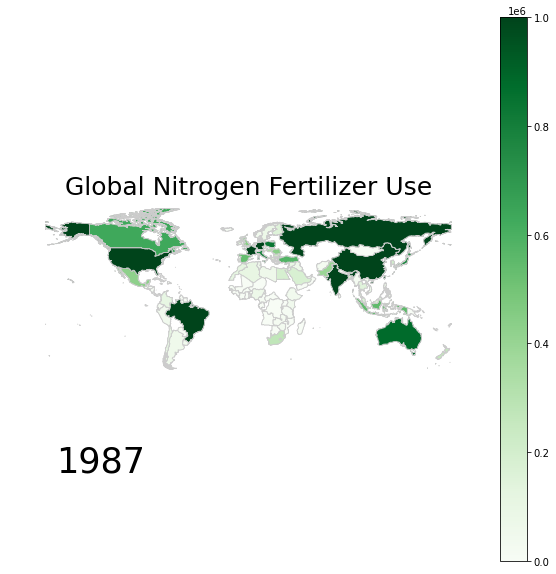

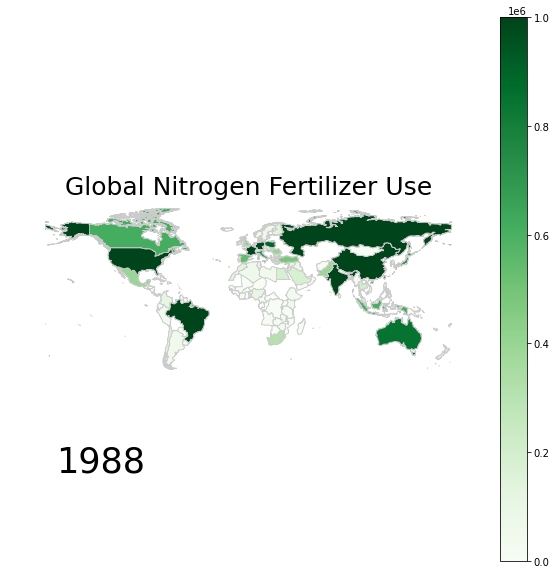

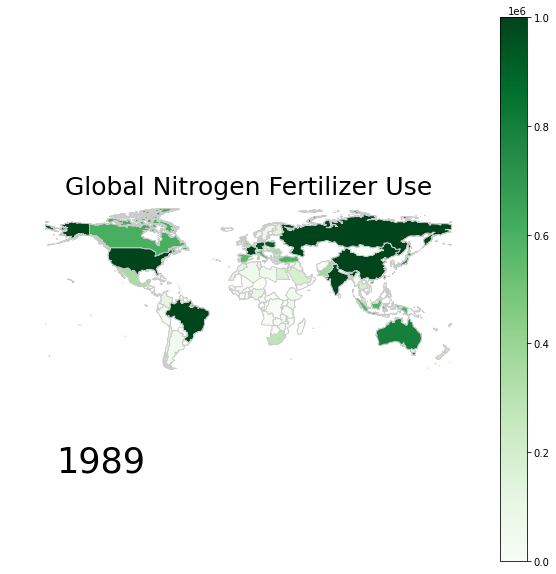

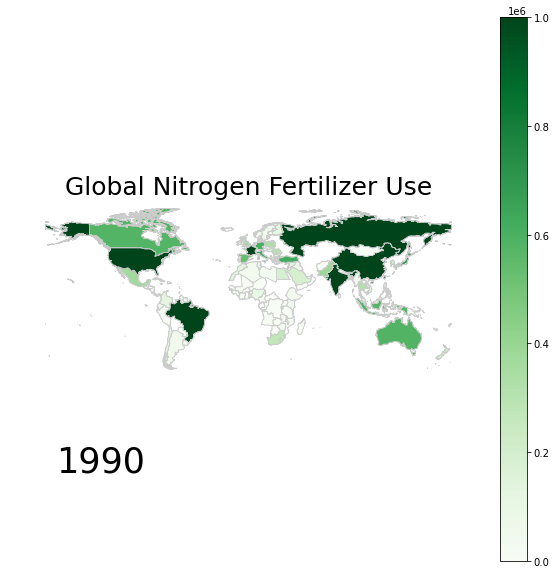

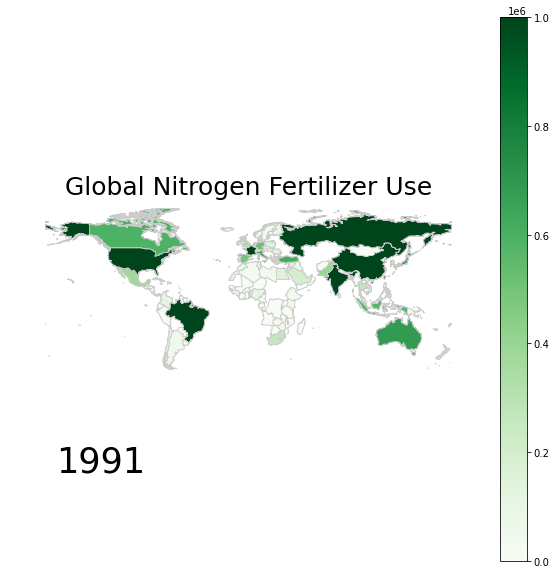

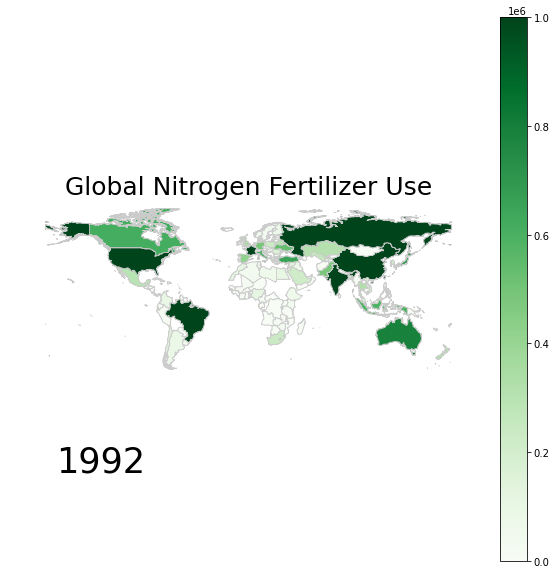

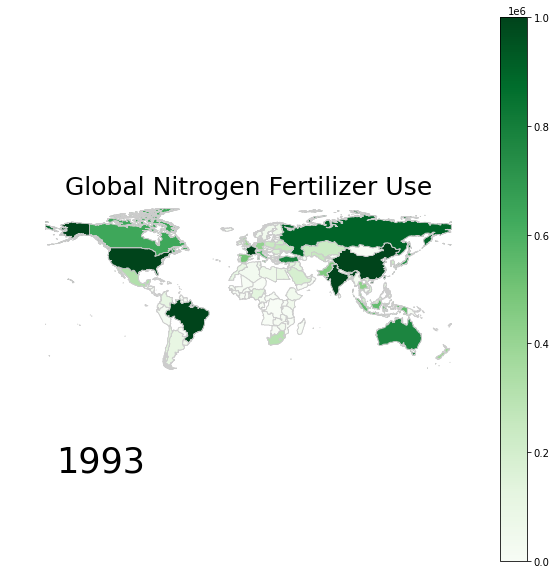

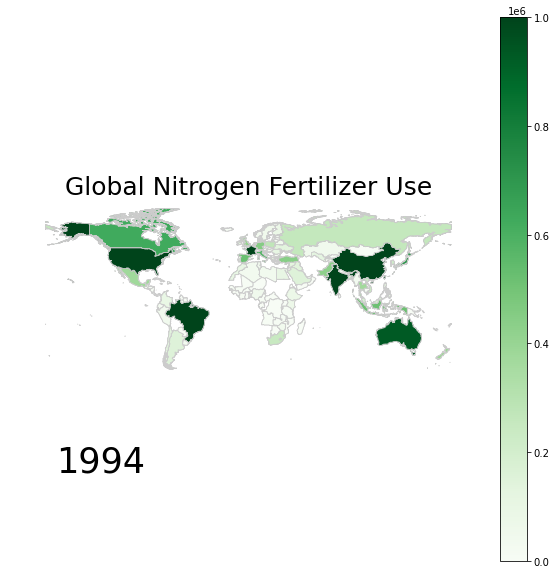

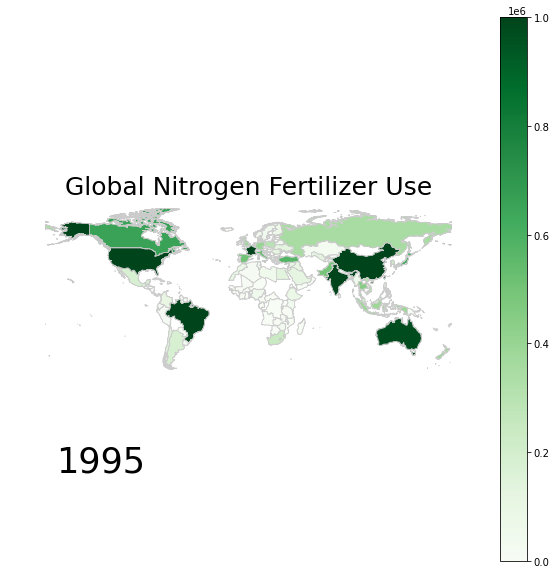

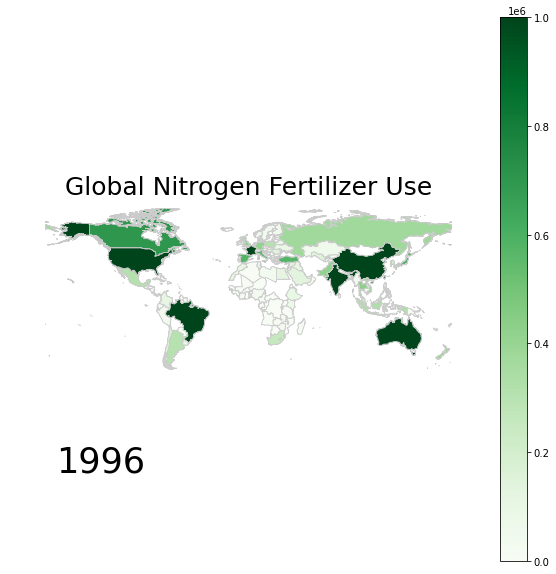

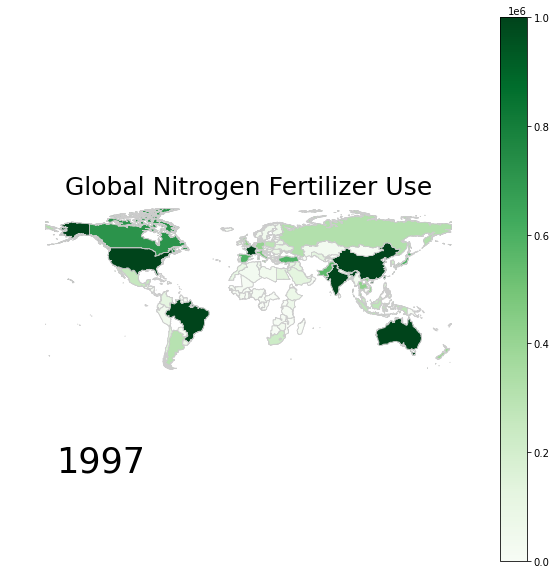

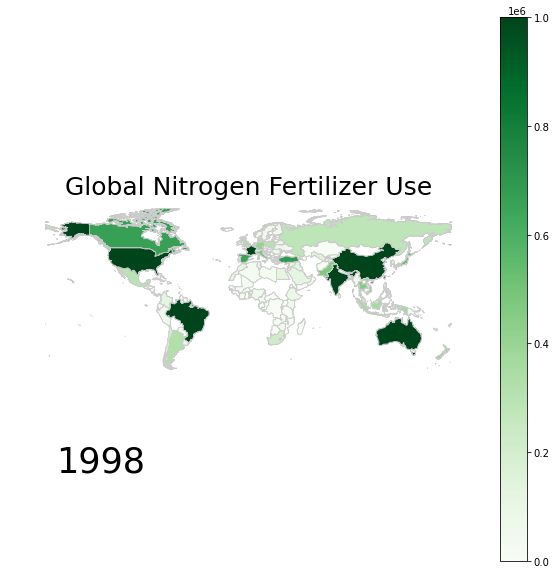

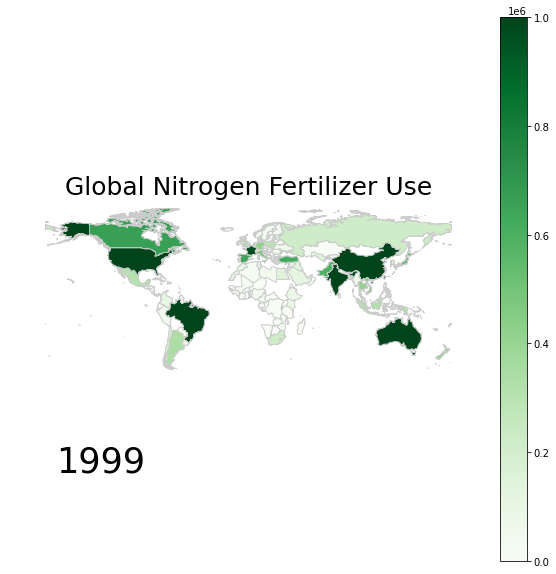

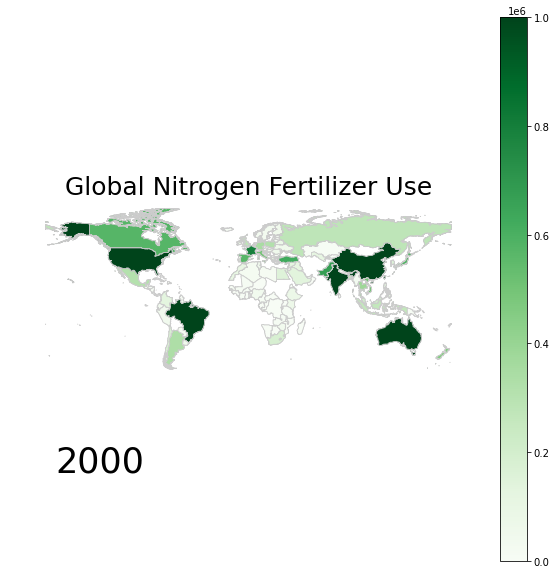

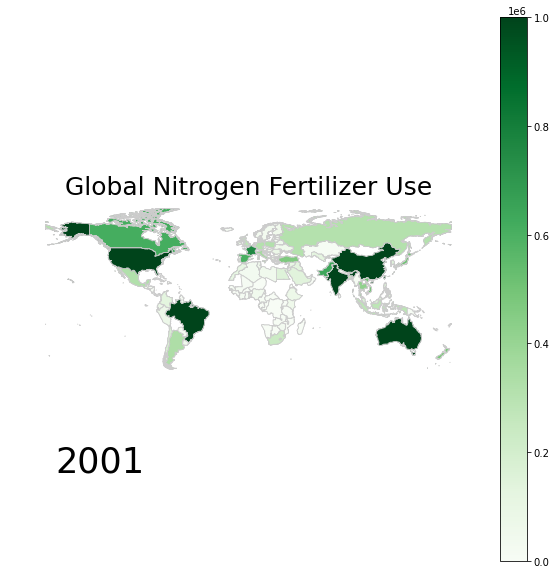

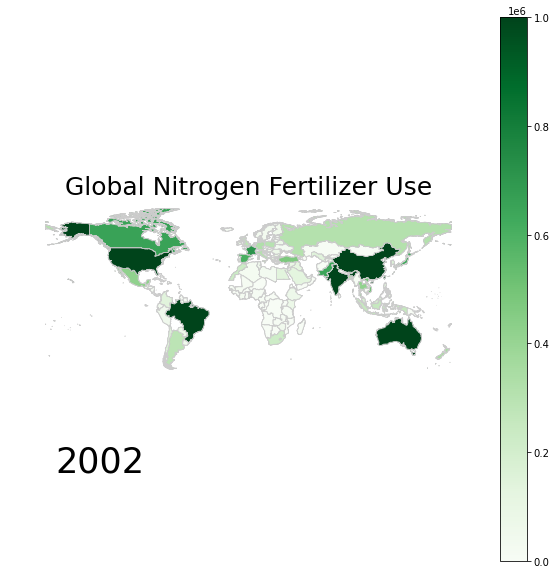

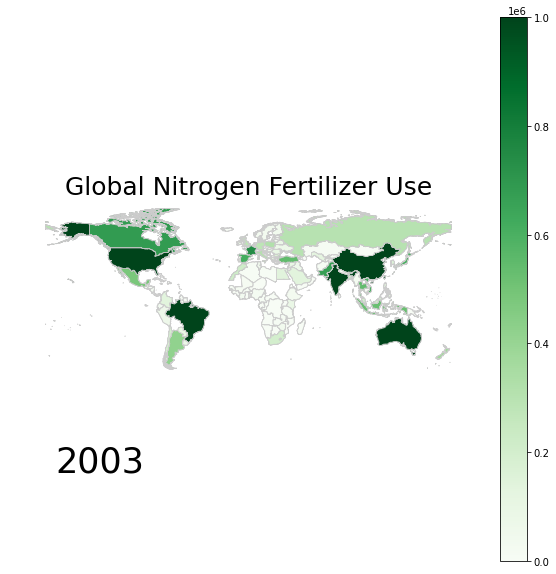

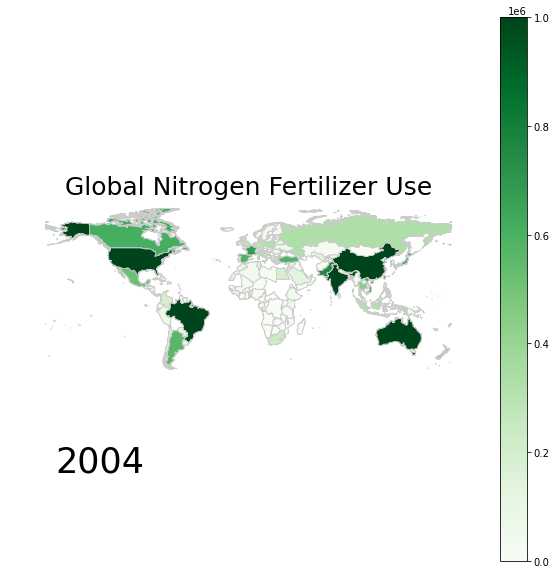

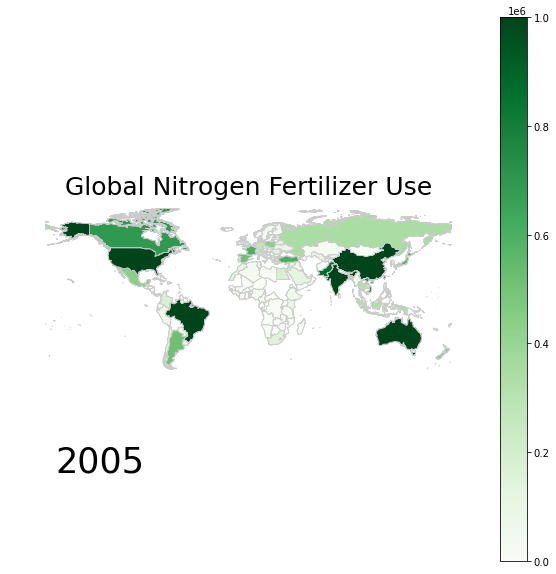

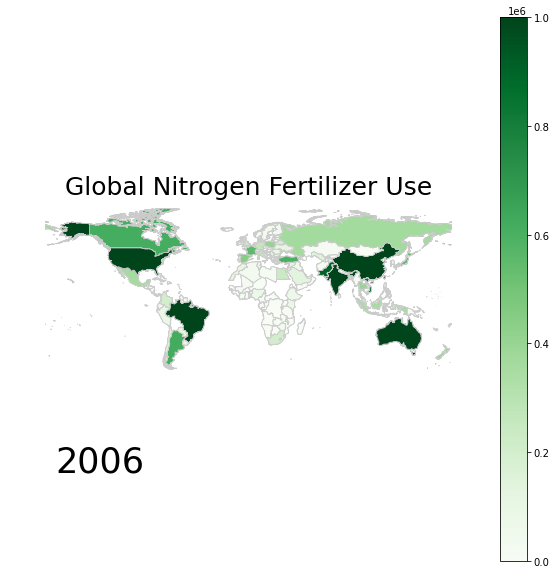

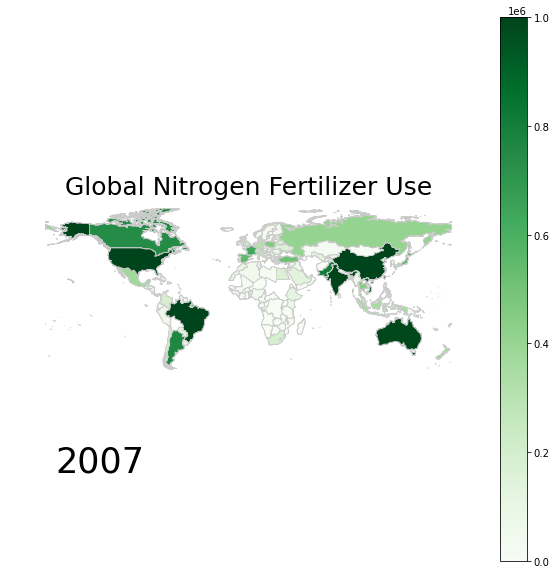

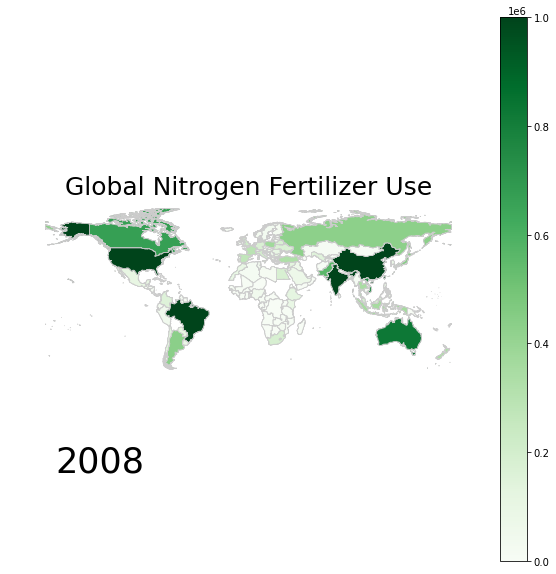

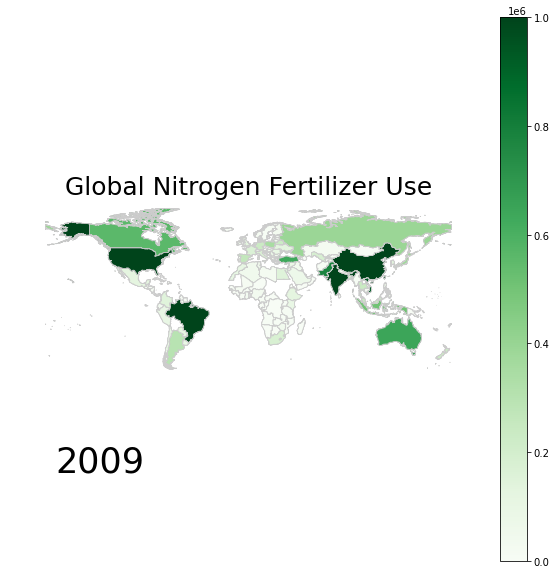

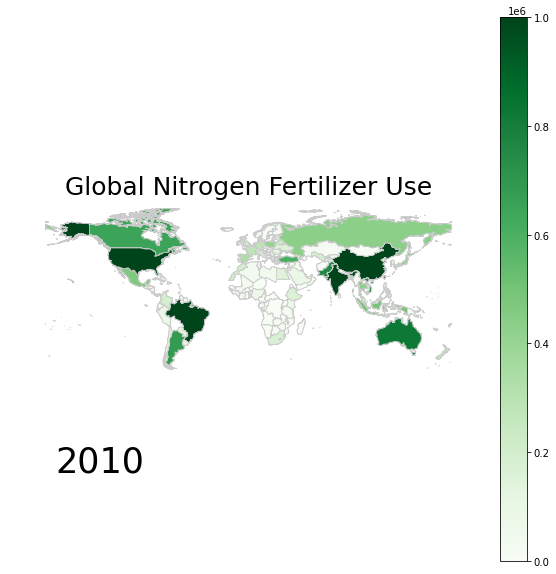

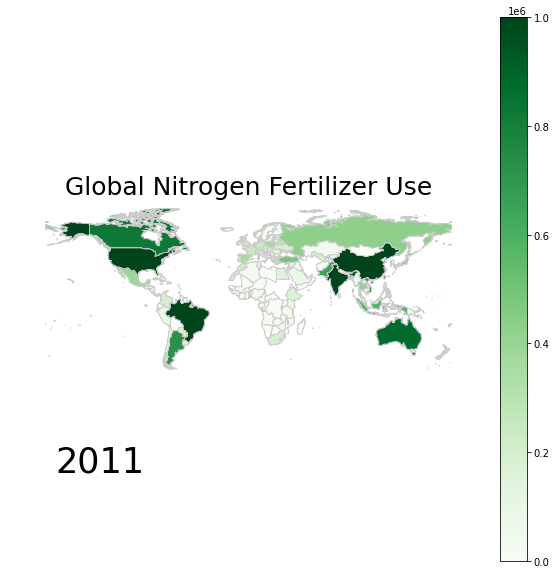

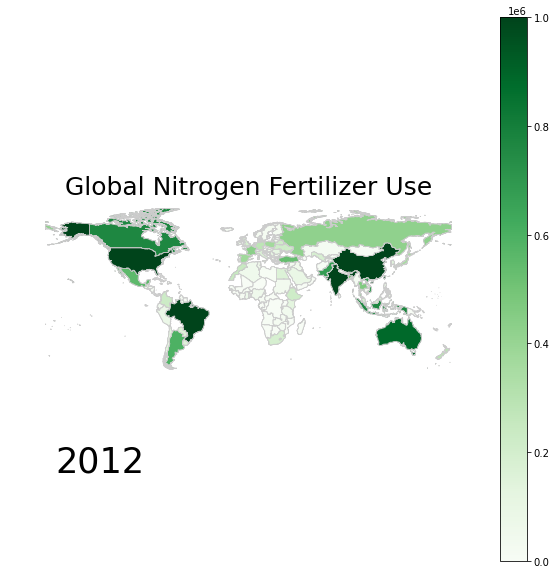

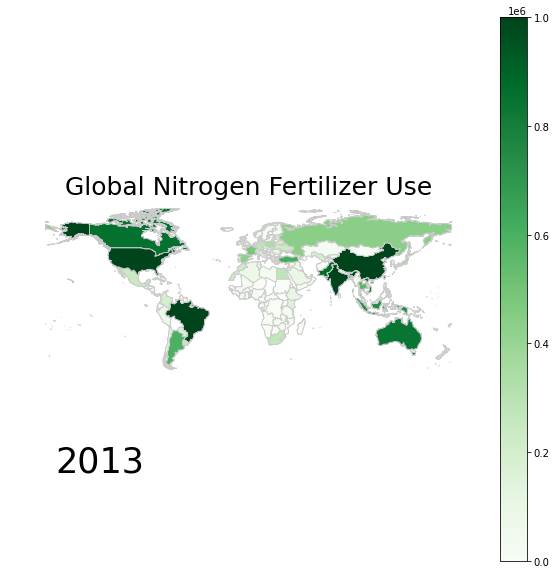

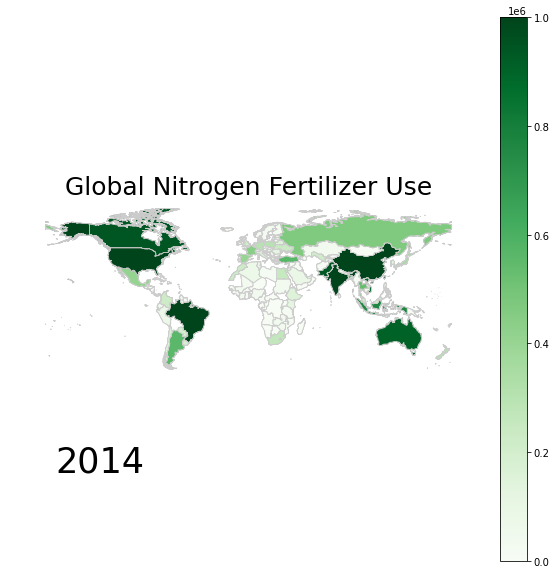

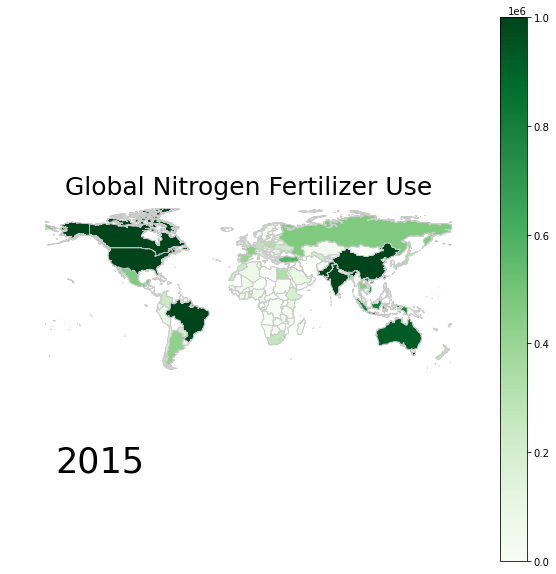

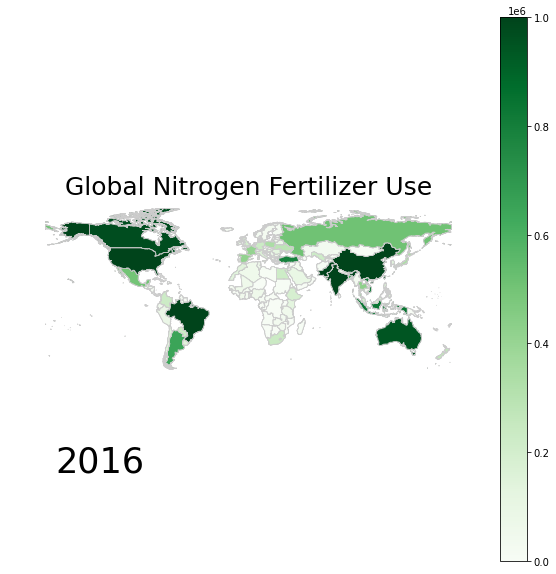

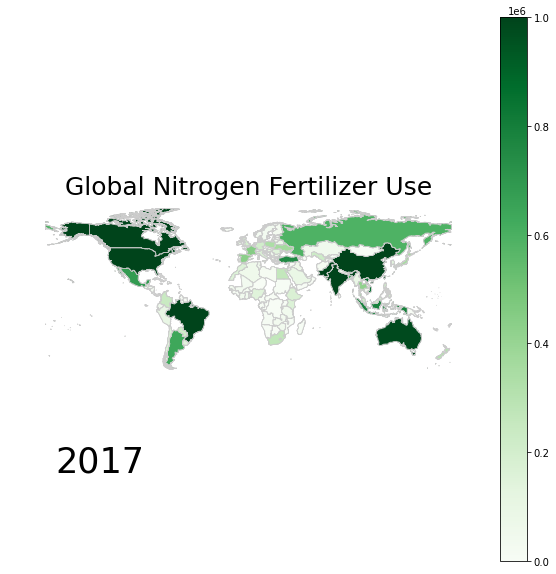

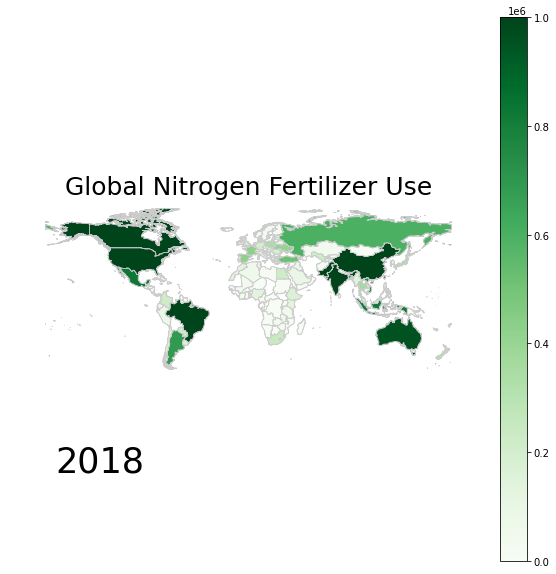

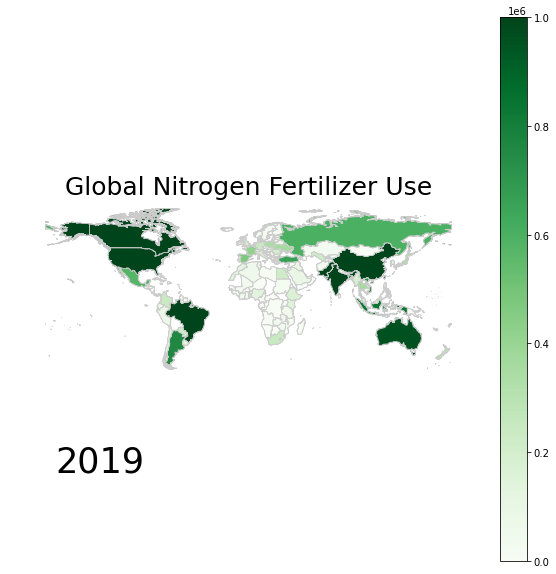

In [58]:
# Loop year year to create image for Nitrogen fertilizer use
for year in year_range:
    df_new = merged.loc[((merged['Year'] == year) & (merged["Item Code"] == 3103))]
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_new.plot(column='Value', cmap='Greens', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # Remove axis
    fig.axis('off')
    
    # Create a title
    fig.set_title('Global Nitrogen Fertilizer Use', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # Position year in bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    # Save image as jpg for gif creation
    filepath = os.path.join(str(year) + '_fert.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [59]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + '_fert.jpg')
    im1.save(str(year) + '_fert.png')
    os.remove(str(year) + '_fert.jpg')

In [60]:
# Loop through png files and resize for better visualization
png_dir = os.getcwd()
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        image = Image.open(file_name)
        new_width  = 800
        new_height = 800
        image = image.resize((new_width, new_height), Image.ANTIALIAS)
        image.save(file_name)

In [61]:
# Create Gif and remove each .png file
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        os.remove(file_path)
imageio.mimsave("MapGif_Phos.gif", images, fps=1)
